Inheritance & Composition in Python are two important concepts in Object Oriented programming that model the relation
between two classes

What to Expect by end of this notebook

- Use inheritance in Python

- Model class hierarchies using inheritance

- Use multiple inheritance in Python and understand its drawbacks

- Use composition to create complex objects

- Reuse existing code by applying composition

- Change application behavior at run-time through composition

In an inheritance relationship:

* Classes that inherit from another are called derived classes, subclasses, or subtypes.

* Classes from which other classes are derived are called base classes or super classes.

* A derived class is said to derive, inherit, or extend a base class.

* Inheritance models a **is a** relationship

### Derived class can replace the Base class in the application

**Liskov Substituition principle** states that “in a computer program, if S is a subtype of T, then objects of type T may be replaced with objects of type S without altering any of the desired properties of the program

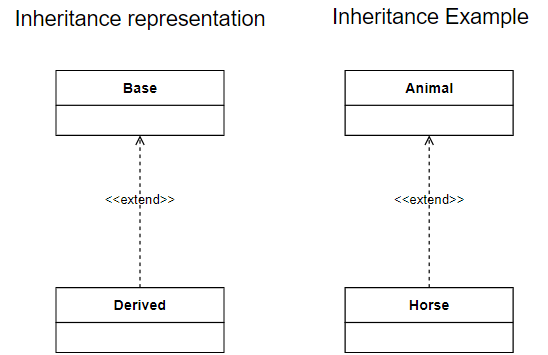

Composition is a concept that models a **has a** relationship. It enables creating complex types by combining objects of other types. This means that a class Composite can contain an object of another class Component. 

This relationship means that a Composite has a Component.

- Classes that contain objects of other classes are usually referred to as **composites**, 

- Classes that are used to create more complex types are referred to as **components**.

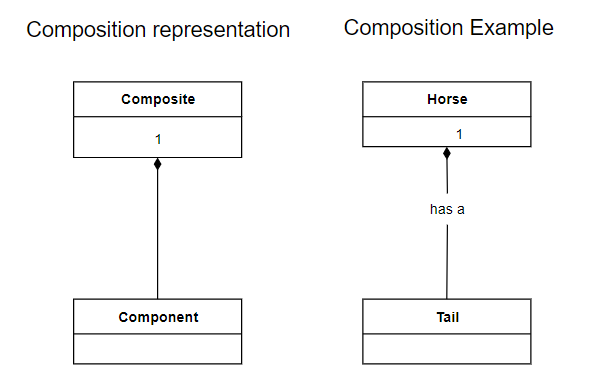

In [1]:
# Simplest possible class

class MyClass:
   pass

c = MyClass()

dir(c)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [2]:
# There are no members declared for MyClass, where are they coming from? Every python class implicitly derives from object.
o = object()
dir(o)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [4]:
# The exception to this rule are classes used to indicate errors by raising an exception.

class MyError:
    pass

raise MyError()

TypeError: exceptions must derive from BaseException

In [5]:
# BaseException is a base class provided for all error types. To create a new error type, you must derive your class from BaseException or one of its derived classes. The convention in Python is to derive your custom error types from Exception, which in turn derives from BaseException.

class MyError(Exception):
    pass

raise MyError()

MyError: 

### Creating Class Hierarchies

- Related class will have common interface defined in Base Class

- Derived class will specialize the interface, for a particular implementation

In [4]:
class PayrollSystem:
    def calculate_payroll(self, employees):
        print("calculating payroll")
        print("===================")
        for employee in employees:
            print(f"payroll for: {employee.id} - {employee.name}")
            # there is a calculate_payroll method in employee class
            print(f"- check amount: {employee.calculate_payroll()}")
            print("")

In [2]:
# implementing base Employee class

class Employee:
    def __init__(self, id, name):
        self.id = id
        self.name = name

# Employee just needs to have the id and name, at the very basic

In [8]:
# HR System requires that every Employee processed must have calculate_payroll() interface
# that returns weekly salary. Implementing interface depends on Employee type

class SalaryEmployee(Employee):
    def __init__(self, id, name, weekly_salary):
        # super() helps to initialize the parent class
        super().__init__(id, name)
        self.weekly_salary = weekly_salary

    def calculate_payroll(self):
        return self.weekly_salary

In [9]:
# There are manufacturing workers who are paid by the hour

class HourlyEmployee(Employee):
    def __init__(self, id, name, hours_worked, hour_salary):
        super().__init__(id, name)
        self.hours_worked = hours_worked
        self.hour_salary = hour_salary

    def calculate_payroll(self):
        return self.hour_salary * self.hours_worked

In [20]:
# There are associates who are paid fixed. Associate is a Salary Employee. 
# which means this Associate has to extend SalaryEmployee only


class AssociateEmployee(SalaryEmployee):
    def __init__(self, id, name, weekly_salary, commision):
        super().__init__(id, name, weekly_salary)
        self.commision = commision

    def calculate_payroll(self):
        # do the fixed salary as per the 
        fixed = super().calculate_payroll()
        # .calculate_payroll() leverages the implementation of the base class to retrieve the fixed salary and adds the commission value.
        return fixed + self.commision

Interfaces are represented similarly to classes with the word interface above the interface name. Interface names are usually prefixed with a capital I.

The derived classes implement the IPayrollCalculator interface, which is required by the PayrollSystem.

In [19]:
import logging

# create logger
logger = logging.getLogger('payroll')
# assign level info to logger
logger.setLevel(level=logging.INFO)
# create handler
streamer = logging.StreamHandler()
# setlevel for handler
streamer.setLevel(level=logging.WARNING)
# create formatter
stream_formater = logging.Formatter(fmt='%(name)s : %(levelname)s - %(message)s')
# attach formatter to handler
streamer.setFormatter(stream_formater)
# attach handler to logger
logger.addHandler(streamer)

In [21]:
salary_emp = SalaryEmployee(1, 'jane smith', 1588)
hourly_emp = HourlyEmployee(2, 'doe smith', 40, 15)
assoc_emp = AssociateEmployee(3, 'danny smith', 658, 579)

payroll_system = PayrollSystem()

try:
    payroll_system.calculate_payroll([
        salary_emp,
        hourly_emp,
        assoc_emp
    ])
except Exception as e:
    logger.exception("Something is amiss")

calculating payroll
payroll for: 1 - jane smith
- check amount: 1588

payroll for: 2 - doe smith
- check amount: 600

payroll for: 3 - danny smith
- check amount: 1237



In [24]:
just_emp = Employee(3, 'Valid smith')

payroll_system = PayrollSystem()

try:
    payroll_system.calculate_payroll([
        just_emp
    ])
except Exception as e:
    logger.exception("Something is amiss")

payroll : ERROR - Something is amiss
Traceback (most recent call last):
  File "C:\Users\kamal\AppData\Local\Temp\ipykernel_6364\3088912071.py", line 6, in <module>
    payroll_system.calculate_payroll([
  File "C:\Users\kamal\AppData\Local\Temp\ipykernel_6364\3797755865.py", line 7, in calculate_payroll
    print(f'- Check amount: {employee.calculate_payroll()}')
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'Employee' object has no attribute 'calculate_payroll'
payroll : ERROR - Something is amiss
Traceback (most recent call last):
  File "C:\Users\kamal\AppData\Local\Temp\ipykernel_6364\3088912071.py", line 6, in <module>
    payroll_system.calculate_payroll([
  File "C:\Users\kamal\AppData\Local\Temp\ipykernel_6364\3797755865.py", line 7, in calculate_payroll
    print(f'- Check amount: {employee.calculate_payroll()}')
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'Employee' object has no attribute 'calculate_payroll'


Calculating Payroll
Payroll for: 3 - Valid smith


Notice how the **Employee base class** doesn’t define a .calculate_payroll() method. This means that if you were to create a plain Employee object and pass it to the PayrollSystem, then **you’d get an error.** 

 To meet the requirements of PayrollSystem, you’ll want to convert the Employee class, which is currently a **concrete class**, to an **abstract class.** The Abstract classes in Python are there to "Inherited" and **never instantiated** ABC module in python enforces this, if you need a class to be a ABC


In [7]:
from abc import ABC, abstractmethod

class Employee(ABC):
    def __init__(self, id, name):
        self.id = id
        self.name = name

    @abstractmethod
    def calculate_payroll(self):
        self

# above code tells to devs that, one cannot instantiate Employee class
# if Employee is inherited, then they have to override calculate_payroll method 

In [25]:
# try creating employee
try:
    abc_emp = Employee(5,'nowork')
except Exception as e:
    logger.exception("Look at the stack trace...")

### what happens when inherit?

The base class interface: The derived class inherits all the methods, properties, and attributes of the base class.

The base class implementation: The derived class inherits the code that implements the class interface.


In [10]:
# We can avoid inheriting Employee and still create objects that can be used by PayrollSystem
# Created object must have id, name and calculate_payroll method

class TroubledEmployee:
    def __init__(self, id, name):
        self.id = id
        self.name = name
    
    def calculate_payroll(self):
        return 100000

temp = TroubledEmployee(7,'Tman')

newPayroll = PayrollSystem()

payroll_system.calculate_payroll([
    temp
])

calculating payroll
payroll for: 7 - Tman
- check amount: 100000



### Use Inheritance only when "is a" relation is present between two Classes

### You can provide just the interface (method) in your class, for it to be used by the system. There is no need to inherit another class

Lets cleanup

In [11]:
class PayrollSystem:
    def calculate_payroll(self, employees):
        print('Calculating Payroll')
        print('===================')
        for employee in employees:
            print(f'Payroll for: {employee.id} - {employee.name}')
            print(f'- Check amount: {employee.calculate_payroll()}')
            print('')

class Employee:
    def __init__(self, id, name):
        self.id = id
        self.name = name

class SalaryEmployee(Employee):
    def __init__(self, id, name, weekly_salary):
        super().__init__(id, name)
        self.weekly_salary = weekly_salary

    def calculate_payroll(self):
        return self.weekly_salary

class HourlyEmployee(Employee):
    def __init__(self, id, name, hours_worked, hour_rate):
        super().__init__(id, name)
        self.hours_worked = hours_worked
        self.hour_rate = hour_rate

    def calculate_payroll(self):
        return self.hours_worked * self.hour_rate

class CommissionEmployee(SalaryEmployee):
    def __init__(self, id, name, weekly_salary, commission):
        super().__init__(id, name, weekly_salary)
        self.commission = commission

    def calculate_payroll(self):
        fixed = super().calculate_payroll()
        return fixed + self.commission

# Basically, you are inheriting the implementation of the id and name attributes of the Employee class in your derived classes. Since .calculate_payroll() is just an interface to the PayrollSystem.calculate_payroll() method, you don’t need to implement it in the Employee base class.

#### This is known as the class explosion problem. See how it happens when implementing ProductivitySystem


- Managers: They walk around yelling at people telling them what to do. They are salaried employees and make more money.

- Secretaries: They do all the paper work for managers and ensure that everything gets billed and payed on time. They are also salaried employees but make less money.

- Sales employees: They make a lot of phone calls to sell products. They have a salary, but they also get commissions for sales.

- Factory workers: They manufacture the products for the company. They are paid by the hour.

In [30]:
# Implementing Types of employee depending on their work. But why? 
# Check the type of work they do. Can't this work and hours, provided during instantiation?
# The number of parameters could increase... 

class Manager(SalaryEmployee):
    def work(self, hours):
        print(f"{self.name} is manager, screams for {hours} hours.") 

class Secretary(SalaryEmployee):
    def work(self, hours):
        print(f"{self.name} is secretary, expends {hours} hours for office work.") 

class SalesPerson(CommissionEmployee):
    def work(self, hours):
        print(f"{self.name} is Sales Person, who makes calls for {hours} hours.") 

class FactoryWorker(HourlyEmployee):
    def work(self, hours):
        print(f"{self.name} is factory worker, who is paid by hour for {hours} hours of work.") 

In [31]:
class ProductivitySystem:
    def track(self, employees, hours):
        print("Tracking employee productivity")
        print("==============================")
        for emp in employees:
            emp.work(hours)
        print(' ')

In [32]:
manager = Manager(1, 'Mary Poppins', 3000)
secretary = Secretary(2, 'John Smith', 1500)
sales_guy = SalesPerson(3, 'Kevin Bacon', 1000, 250)
factory_worker = FactoryWorker(2, 'Jane Doe', 40, 15)
employees = [
    manager,
    secretary,
    sales_guy,
    factory_worker,
]

In [33]:
productivity = ProductivitySystem()
productivity.track(employees, 40)
payroll_system = PayrollSystem()
payroll_system.calculate_payroll(employees)

Tracking employee productivity
Mary Poppins is manager, screams for 40 hours.
John Smith is secretary, expends 40 hours for office work.
Kevin Bacon is Sales Person, who makes calls for 40 hours.
Jane Doe is factory worker, who is paid by hour for 40 hours of work.
 
Calculating Payroll
Payroll for: 1 - Mary Poppins
- Check amount: 3000

Payroll for: 2 - John Smith
- Check amount: 1500

Payroll for: 3 - Kevin Bacon
- Check amount: 1250

Payroll for: 2 - Jane Doe
- Check amount: 600



Multiple inheritance is the ability to derive a class from multiple base classes at the same time.

Modern programming languages support the concept of interfaces. 

In those languages, you inherit from a single base class and then implement multiple interfaces, so your class can be re-used in different situations.

#### Implementing a temporary secretary

It seems you have two options to implement the TemporarySecretary class:

Derive from Secretary: You can derive from Secretary to inherit the .work() method for the role, and then override the .calculate_payroll() method to implement it as an HourlyEmployee.

Derive from HourlyEmployee: You can derive from HourlyEmployee to inherit the .calculate_payroll() method, and then override the .work() method to implement it as a Secretary

Okay, why not use the multiple inheritance, derive from Secretary and HourlyEmployee?

In [37]:
class TemporarySecretary(Secretary, HourlyEmployee):
    pass
# If you try to create a temporary secretary, you will face errors
temporary_secretary = TemporarySecretary(5, 'Robin Williams', 40, 9)

TypeError: SalaryEmployee.__init__() takes 4 positional arguments but 5 were given

In [38]:
class TemporarySecretary(HourlyEmployee, Secretary):
    pass
# If you try to create a temporary secretary, you will face errors
temporary_secretary = TemporarySecretary(5, 'Robin Williams', 40, 9)

TypeError: SalaryEmployee.__init__() missing 1 required positional argument: 'weekly_salary'

### Time to dive into MRO

In [40]:
# When a method or attribute of a class is accessed, Python uses the class MRO to find it. The MRO is also used by super() to determine which method or attribute to invoke. You can learn more about super() in Supercharge Your Classes With Python super().

TemporarySecretary.__mro__
# This leads to the **diamond problem** in python multiple inheritance

(__main__.TemporarySecretary,
 __main__.HourlyEmployee,
 __main__.Secretary,
 __main__.SalaryEmployee,
 __main__.Employee,
 object)

### Diamond Problem

Diamond problem appears when you’re using multiple inheritance and deriving from two classes that have a common base class. 

This causes two paths to reach the Employee base class, which is something you want to avoid in your designs.


The Employee derived classes are used by two different systems:

- The productivity system that tracks employee productivity.

- The payroll system that calculates the employee payroll.

In [41]:
# In productivity.py

class ProductivitySystem:
    def track(self, employees, hours):
        print('Tracking Employee Productivity')
        print('==============================')
        for employee in employees:
            result = employee.work(hours)
            print(f'{employee.name}: {result}')
        print('')

class ManagerRole:
    def work(self, hours):
        return f'screams and yells for {hours} hours.'

class SecretaryRole:
    def work(self, hours):
        return f'expends {hours} hours doing office paperwork.'

class SalesRole:
    def work(self, hours):
        return f'expends {hours} hours on the phone.'

class FactoryRole:
    def work(self, hours):
        return f'manufactures gadgets for {hours} hours.'

In [48]:
# In hr.py

class PayrollSystem:
    def calculate_payroll(self, employees):
        print('Calculating Payroll')
        print('===================')
        for employee in employees:
            print(f'Payroll for: {employee.id} - {employee.name}')
            print(f'- Check amount: {employee.calculate_payroll()}')
            if employee.address:
                print('- Sent to:')
                print(employee.address)
            print('')

class SalaryPolicy:
    def __init__(self, weekly_salary):
        self.weekly_salary = weekly_salary

    def calculate_payroll(self):
        return self.weekly_salary

class HourlyPolicy:
    def __init__(self, hours_worked, hour_rate):
        self.hours_worked = hours_worked
        self.hour_rate = hour_rate

    def calculate_payroll(self):
        return self.hours_worked * self.hour_rate

class CommissionPolicy(SalaryPolicy):
    def __init__(self, weekly_salary, commission):
        super().__init__(weekly_salary)
        self.commission = commission

    def calculate_payroll(self):
        fixed = super().calculate_payroll()
        return fixed + self.commission

In [51]:
class Employee:
    def __init__(self, id, name):
        self.id = id
        self.name = name

class Manager(Employee, ManagerRole, SalaryPolicy):
    def __init__(self, id, name, weekly_salary):
        SalaryPolicy.__init__(self, weekly_salary)
        super().__init__(id, name)

class Secretary(Employee, SecretaryRole, SalaryPolicy):
    def __init__(self, id, name, weekly_salary):
        SalaryPolicy.__init__(self, weekly_salary)
        super().__init__(id, name)

class SalesPerson(Employee, SalesRole, CommissionPolicy):
    def __init__(self, id, name, weekly_salary, commission):
        CommissionPolicy.__init__(self, weekly_salary, commission)
        super().__init__(id, name)

class FactoryWorker(Employee, FactoryRole, HourlyPolicy):
    def __init__(self, id, name, hours_worked, hour_rate):
        HourlyPolicy.__init__(self, hours_worked, hour_rate)
        super().__init__(id, name)

class TemporarySecretary(Employee, SecretaryRole, HourlyPolicy):
    def __init__(self, id, name, hours_worked, hour_rate):
        HourlyPolicy.__init__(self, hours_worked, hour_rate)
        super().__init__(id, name)

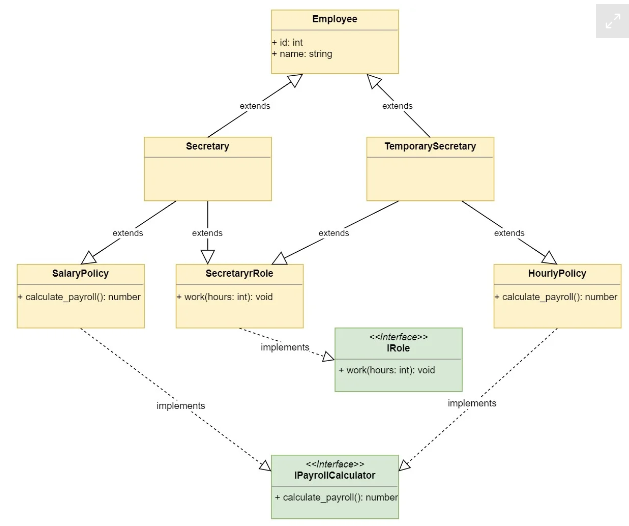

#### Composition in Python (has a/ have a)

Composition is an object oriented design concept that models a has a relationship. In composition, a class known as composite contains an object of another class known to as component.

The composition relation between two classes is considered loosely coupled. That means that changes to the component class rarely affect the composite class, and changes to the composite class never affect the component class.

Implemented Employee Class "has a" name and "has a" id. Also the Employee can "have a" address. So lets create a Address class

In [44]:
# In contacts.py

class Address:
    def __init__(self, street, city, state, zipcode, street2=''):
        self.street = street
        self.street2 = street2
        self.city = city
        self.state = state
        self.zipcode = zipcode

    def __str__(self):
        lines = [self.street]
        if self.street2:
            lines.append(self.street2)
        lines.append(f'{self.city}, {self.state} {self.zipcode}')
        return '\n'.join(lines)

In [46]:
addr = Address('55 main', 'concord', 'NH', '03858')
print(addr)

55 main
concord, NH 03858


In [54]:
# In employees.py

class Employee:
    def __init__(self, id, name):
        self.id = id
        self.name = name
        self.address = None

In [55]:
class Manager(Employee, ManagerRole, SalaryPolicy):
    def __init__(self, id, name, weekly_salary):
        SalaryPolicy.__init__(self, weekly_salary)
        super().__init__(id, name)

class Secretary(Employee, SecretaryRole, SalaryPolicy):
    def __init__(self, id, name, weekly_salary):
        SalaryPolicy.__init__(self, weekly_salary)
        super().__init__(id, name)

class SalesPerson(Employee, SalesRole, CommissionPolicy):
    def __init__(self, id, name, weekly_salary, commission):
        CommissionPolicy.__init__(self, weekly_salary, commission)
        super().__init__(id, name)

class FactoryWorker(Employee, FactoryRole, HourlyPolicy):
    def __init__(self, id, name, hours_worked, hour_rate):
        HourlyPolicy.__init__(self, hours_worked, hour_rate)
        super().__init__(id, name)

class TemporarySecretary(Employee, SecretaryRole, HourlyPolicy):
    def __init__(self, id, name, hours_worked, hour_rate):
        HourlyPolicy.__init__(self, hours_worked, hour_rate)
        super().__init__(id, name)

In [56]:
# In program.py

manager = Manager(1, 'Mary Poppins', 3000)
manager.address = Address(
    '121 Admin Rd', 
    'Concord', 
    'NH', 
    '03301'
)
secretary = Secretary(2, 'John Smith', 1500)
secretary.address = Address(
    '67 Paperwork Ave.', 
    'Manchester', 
    'NH', 
    '03101'
)
sales_guy = SalesPerson(3, 'Kevin Bacon', 1000, 250)
factory_worker = FactoryWorker(4, 'Jane Doe', 40, 15)
temporary_secretary = TemporarySecretary(5, 'Robin Williams', 40, 9)
employees = [
    manager,
    secretary,
    sales_guy,
    factory_worker,
    temporary_secretary,
]
productivity_system = ProductivitySystem()
productivity_system.track(employees, 40)
payroll_system = PayrollSystem()
payroll_system.calculate_payroll(employees)

Tracking Employee Productivity
Mary Poppins: screams and yells for 40 hours.
John Smith: expends 40 hours doing office paperwork.
Kevin Bacon: expends 40 hours on the phone.
Jane Doe: manufactures gadgets for 40 hours.
Robin Williams: expends 40 hours doing office paperwork.

Calculating Payroll
Payroll for: 1 - Mary Poppins
- Check amount: 3000
- Sent to:
121 Admin Rd
Concord, NH 03301

Payroll for: 2 - John Smith
- Check amount: 1500
- Sent to:
67 Paperwork Ave.
Manchester, NH 03101

Payroll for: 3 - Kevin Bacon
- Check amount: 1250

Payroll for: 4 - Jane Doe
- Check amount: 600

Payroll for: 5 - Robin Williams
- Check amount: 360



### Starting Composition 

Composition is more flexible than inheritance because it models a loosely coupled relationship. Changes to a component class have minimal or no effects on the composite class. Designs based on composition are more suitable to change.

In [57]:
# In productivity.py

class ProductivitySystem:
    def __init__(self):
        self._roles = {
            'manager': ManagerRole,
            'secretary': SecretaryRole,
            'sales': SalesRole,
            'factory': FactoryRole,
        }

    def get_role(self, role_id):
        role_type = self._roles.get(role_id)
        if not role_type:
            raise ValueError('role_id')
        return role_type()

    def track(self, employees, hours):
        print('Tracking Employee Productivity')
        print('==============================')
        for employee in employees:
            employee.work(hours)
        print('')

In [58]:
# In productivity.py
# Roles have same methodss, they are common interfaces
class ManagerRole:
    def perform_duties(self, hours):
        return f'screams and yells for {hours} hours.'

class SecretaryRole:
    def perform_duties(self, hours):
        return f'does paperwork for {hours} hours.'

class SalesRole:
    def perform_duties(self, hours):
        return f'expends {hours} hours on the phone.'

class FactoryRole:
    def perform_duties(self, hours):
        return f'manufactures gadgets for {hours} hours.'

In [60]:
# In hr.py

class PayrollPolicy:
    def __init__(self):
        self.hours_worked = 0

    def track_work(self, hours):
        self.hours_worked += hours

class SalaryPolicy(PayrollPolicy):
    def __init__(self, weekly_salary):
        super().__init__()
        self.weekly_salary = weekly_salary

    def calculate_payroll(self):
        return self.weekly_salary

class HourlyPolicy(PayrollPolicy):
    def __init__(self, hour_rate):
        super().__init__()
        self.hour_rate = hour_rate

    def calculate_payroll(self):
        return self.hours_worked * self.hour_rate

class CommissionPolicy(SalaryPolicy):
    def __init__(self, weekly_salary, commission_per_sale):
        super().__init__(weekly_salary)
        self.commission_per_sale = commission_per_sale

    @property
    def commission(self):
        sales = self.hours_worked / 5
        return sales * self.commission_per_sale

    def calculate_payroll(self):
        fixed = super().calculate_payroll()
        return fixed + self.commission

In [74]:
# In hr.py

class PayrollSystem:
    def __init__(self):
        self._employee_policies = {
            1: SalaryPolicy(3000),
            2: SalaryPolicy(1500),
            3: CommissionPolicy(1000, 100),
            4: HourlyPolicy(15),
            5: HourlyPolicy(9),
            8: CommissionPolicy(500,100),
        }

    def get_policy(self, employee_id):
        policy = self._employee_policies.get(employee_id)
        if not policy:
            return ValueError(employee_id)
        return policy

    def calculate_payroll(self, employees):
        print('Calculating Payroll')
        print('===================')
        for employee in employees:
            print(f'Payroll for: {employee.id} - {employee.name}')
            print(f'- Check amount: {employee.calculate_payroll()}')
            if employee.address:
                print('- Sent to:')
                print(employee.address)
            print('')

In [72]:
# In contacts.py

class AddressBook:
    def __init__(self):
        self._employee_addresses = {
            1: Address('121 Admin Rd.', 'Concord', 'NH', '03301'),
            2: Address('67 Paperwork Ave', 'Manchester', 'NH', '03101'),
            3: Address('15 Rose St', 'Concord', 'NH', '03301', 'Apt. B-1'),
            4: Address('39 Sole St.', 'Concord', 'NH', '03301'),
            5: Address('99 Mountain Rd.', 'Concord', 'NH', '03301'),
            8: Address('88 Eight Cross Rd.', 'Coonoor', 'TN', '603301'),
        }

    def get_employee_address(self, employee_id):
        address = self._employee_addresses.get(employee_id)
        if not address:
            raise ValueError(employee_id)
        return address

In [75]:
# In employees.py

class EmployeeDatabase:
    def __init__(self):
        self._employees = [
            {
                'id': 1,
                'name': 'Mary Poppins',
                'role': 'manager'
            },
            {
                'id': 2,
                'name': 'John Smith',
                'role': 'secretary'
            },
            {
                'id': 3,
                'name': 'Kevin Bacon',
                'role': 'sales'
            },
            {
                'id': 4,
                'name': 'Jane Doe',
                'role': 'factory'
            },
            {
                'id': 5,
                'name': 'Robin Williams',
                'role': 'secretary'
            },
            {
                'id': 8,
                'name': 'Will',
                'role': 'sales' 
            },
        ]
        self.productivity = ProductivitySystem()
        self.payroll = PayrollSystem()
        self.employee_addresses = AddressBook()

    @property
    def employees(self):
        return [self._create_employee(**data) for data in self._employees]

    def _create_employee(self, id, name, role):
        address = self.employee_addresses.get_employee_address(id)
        employee_role = self.productivity.get_role(role)
        payroll_policy = self.payroll.get_policy(id)
        return Employee(id, name, address, employee_role, payroll_policy) # Employee is composed using the components and minimal input into the database

In [76]:
explore_db = EmployeeDatabase()
explore_db._employees

[{'id': 1, 'name': 'Mary Poppins', 'role': 'manager'},
 {'id': 2, 'name': 'John Smith', 'role': 'secretary'},
 {'id': 3, 'name': 'Kevin Bacon', 'role': 'sales'},
 {'id': 4, 'name': 'Jane Doe', 'role': 'factory'},
 {'id': 5, 'name': 'Robin Williams', 'role': 'secretary'},
 {'id': 8, 'name': 'Will', 'role': 'sales'}]

In [80]:
explore_db.employees[-1].name

'Will'

In [63]:
# In employees.py

class Employee:
    def __init__(self, id, name, address, role, payroll):
        self.id = id
        self.name = name
        self.address = address
        self.role = role
        self.payroll = payroll

    def work(self, hours):
        duties = self.role.perform_duties(hours)
        print(f'Employee {self.id} - {self.name}:')
        print(f'- {duties}')
        print('')
        self.payroll.track_work(hours)

    def calculate_payroll(self):
        return self.payroll.calculate_payroll()

In [81]:
explore_db.employees[-1].work(5)

Employee 8 - Will:
- expends 5 hours on the phone.



In [82]:
productivity_system = ProductivitySystem()
payroll_system = PayrollSystem()
employee_database = EmployeeDatabase()
employees = employee_database.employees
productivity_system.track(employees, 40)
payroll_system.calculate_payroll(employees)

Tracking Employee Productivity
Employee 1 - Mary Poppins:
- screams and yells for 40 hours.

Employee 2 - John Smith:
- does paperwork for 40 hours.

Employee 3 - Kevin Bacon:
- expends 40 hours on the phone.

Employee 4 - Jane Doe:
- manufactures gadgets for 40 hours.

Employee 5 - Robin Williams:
- does paperwork for 40 hours.

Employee 8 - Will:
- expends 40 hours on the phone.


Calculating Payroll
Payroll for: 1 - Mary Poppins
- Check amount: 3000
- Sent to:
121 Admin Rd.
Concord, NH 03301

Payroll for: 2 - John Smith
- Check amount: 1500
- Sent to:
67 Paperwork Ave
Manchester, NH 03101

Payroll for: 3 - Kevin Bacon
- Check amount: 1800.0
- Sent to:
15 Rose St
Apt. B-1
Concord, NH 03301

Payroll for: 4 - Jane Doe
- Check amount: 600
- Sent to:
39 Sole St.
Concord, NH 03301

Payroll for: 5 - Robin Williams
- Check amount: 360
- Sent to:
99 Mountain Rd.
Concord, NH 03301

Payroll for: 8 - Will
- Check amount: 1300.0
- Sent to:
88 Eight Cross Rd.
Coonoor, TN 603301



In [66]:
# In program.py

productivity_system = ProductivitySystem()
payroll_system = PayrollSystem()
employee_database = EmployeeDatabase()

employees = employee_database.employees
manager = employees[0]

# Changing the policy of one employee during the run-time
manager.payroll = HourlyPolicy(55)

productivity_system.track(employees, 40)
payroll_system.calculate_payroll(employees)

Tracking Employee Productivity
Employee 1 - Mary Poppins:
- screams and yells for 40 hours.

Employee 2 - John Smith:
- does paperwork for 40 hours.

Employee 3 - Kevin Bacon:
- expends 40 hours on the phone.

Employee 4 - Jane Doe:
- manufactures gadgets for 40 hours.

Employee 5 - Robin Williams:
- does paperwork for 40 hours.


Calculating Payroll
Payroll for: 1 - Mary Poppins
- Check amount: 2200
- Sent to:
121 Admin Rd.
Concord, NH 03301

Payroll for: 2 - John Smith
- Check amount: 1500
- Sent to:
67 Paperwork Ave
Manchester, NH 03101

Payroll for: 3 - Kevin Bacon
- Check amount: 1800.0
- Sent to:
15 Rose St
Apt. B-1
Concord, NH 03301

Payroll for: 4 - Jane Doe
- Check amount: 600
- Sent to:
39 Sole St.
Concord, NH 03301

Payroll for: 5 - Robin Williams
- Check amount: 360
- Sent to:
99 Mountain Rd.
Concord, NH 03301



## Problem is : Reusing the code & implementation of one class inside another class
### Why use another class: Because we are modifying its behaviour in someway
### Behaviour is coded in the methods of the class

Composition does it by initialising the Objects of the class from which the code has to be used, inside another class. Uses the "has a" relationship.

While inheritance does it by becoming a subType of another class, using "is a" relationship. We need to use Method Over-riding to change te behaviour. No other choice 

### Completed both Inheritance & Composition: Problems they solve are same.


Where to use Inheritance or not? Follow theses steps:

Evaluate B is an A: Think about this relationship and justify it. Does it make sense?

Evaluate A is a B: Reverse the relationship and justify it. Does it also make sense?

If you can justify both relationships, then you should never inherit those classes from one another. Let’s look at a more concrete example

#### A mixin is a class that provides methods to other classes but are not considered a base class.
A mixin allows other classes to reuse its interface and implementation without becoming a super class. 

In [83]:
# Creating the AsDictionaryMixin class

class AsDictionaryMixin:
    def to_dict(self):
        return {
            prop: self._represent(value)
            for prop, value in self.__dict__.items()
            if not self._is_internal(prop)
        }

    def _represent(self, value):
        if isinstance(value, object):
            if hasattr(value, 'to_dict'):
                return value.to_dict()
            else:
                return str(value)
        else:
            return value

    def _is_internal(self, prop):
        return prop.startswith('_')

In [84]:
# making the role and payroll private with an _
# We are using AsDictionaryMixin with employee also
class Employee(AsDictionaryMixin):
    def __init__(self, id, name, address, role, payroll):
        self.id = id
        self.name = name
        self.address = address
        self._role = role
        self._payroll = payroll

    def work(self, hours):
        duties = self._role.perform_duties(hours)
        print(f'Employee {self.id} - {self.name}:')
        print(f'- {duties}')
        print('')
        self._payroll.track_work(hours)

    def calculate_payroll(self):
        return self._payroll.calculate_payroll()

In [85]:
# we are extending AsDictionaryMixin
class Address(AsDictionaryMixin):
    def __init__(self, street, city, state, zipcode, street2=''):
        self.street = street
        self.street2 = street2
        self.city = city
        self.state = state
        self.zipcode = zipcode

    def __str__(self):
        lines = [self.street]
        if self.street2:
            lines.append(self.street2)
        lines.append(f'{self.city}, {self.state} {self.zipcode}')
        return '\n'.join(lines)

In [86]:
# re-initialising the AddressBook
class AddressBook:
    def __init__(self):
        self._employee_addresses = {
            1: Address('121 Admin Rd.', 'Concord', 'NH', '03301'),
            2: Address('67 Paperwork Ave', 'Manchester', 'NH', '03101'),
            3: Address('15 Rose St', 'Concord', 'NH', '03301', 'Apt. B-1'),
            4: Address('39 Sole St.', 'Concord', 'NH', '03301'),
            5: Address('99 Mountain Rd.', 'Concord', 'NH', '03301'),
            8: Address('88 Eight Cross Rd.', 'Coonoor', 'TN', '603301'),
        }

    def get_employee_address(self, employee_id):
        address = self._employee_addresses.get(employee_id)
        if not address:
            raise ValueError(employee_id)
        return address

In [87]:
# In program.py
import json
def print_dict(d):
    print(json.dumps(d, indent=2))

for employee in EmployeeDatabase().employees:
    print_dict(employee.to_dict())

{
  "id": "1",
  "name": "Mary Poppins",
  "address": {
    "street": "121 Admin Rd.",
    "street2": "",
    "city": "Concord",
    "state": "NH",
    "zipcode": "03301"
  }
}
{
  "id": "2",
  "name": "John Smith",
  "address": {
    "street": "67 Paperwork Ave",
    "street2": "",
    "city": "Manchester",
    "state": "NH",
    "zipcode": "03101"
  }
}
{
  "id": "3",
  "name": "Kevin Bacon",
  "address": {
    "street": "15 Rose St",
    "street2": "Apt. B-1",
    "city": "Concord",
    "state": "NH",
    "zipcode": "03301"
  }
}
{
  "id": "4",
  "name": "Jane Doe",
  "address": {
    "street": "39 Sole St.",
    "street2": "",
    "city": "Concord",
    "state": "NH",
    "zipcode": "03301"
  }
}
{
  "id": "5",
  "name": "Robin Williams",
  "address": {
    "street": "99 Mountain Rd.",
    "street2": "",
    "city": "Concord",
    "state": "NH",
    "zipcode": "03301"
  }
}
{
  "id": "8",
  "name": "Will",
  "address": {
    "street": "88 Eight Cross Rd.",
    "street2": "",
    "c

You leveraged the implementation of AsDictionaryMixin in both Employee and Address classes even when they are not related. Because AsDictionaryMixin only provides behavior, it is easy to reuse with other classes without causing problems.